In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def initialize_centroids(points, k):
    init_centroids = points[np.random.randint(points.shape[0], size=k)]
    return init_centroids

def euclidean_distance(centroid, points):
    dist = np.linalg.norm(points - centroid, axis=1)
    return dist

def second_smallest(numbers):
    a1, a2 = float('inf'), float('inf')

    for x in numbers:
        if x <= a1:
            a1, a2 = x, a1
        elif x < a2:
            a2 = x
    return a2

In [2]:
dataFrame = pd.read_csv('./Data/iris.csv')

data = dataFrame.values

X = data[:, 1:-1].astype(float)

k = 3
maxiter = 10

best_cost = list()
best_centroids = list()

iter_centroids = list()
iter_cost = list()

for r in range(100):
    m = len(X)

    centroids = initialize_centroids(X, k)

    classes = np.zeros(X.shape[0], dtype=np.float64)
    distances = np.zeros([X.shape[0], k], dtype=np.float64)

    mat_dist = np.zeros([X.shape[0], k], dtype=np.float64)

    cost_list = list()
    centroids_list = list()

    for i in range(maxiter):
        for idx, c, in enumerate(centroids):
            distances[:, idx] = euclidean_distance(c, X)
        each_cost = (1.0 / m)*np.sum(distances)

        classes = np.argmin(distances, axis=1)

        for cluster in range(k):
            centroids[cluster] = np.mean(X[classes == cluster], 0)

        for idx, c in enumerate(centroids):
            mat_dist[:, idx] = euclidean_distance(c, X)
        each_cost = (1.0 / m)*np.sum(mat_dist)

        cost_list.append(each_cost)
        centroids_list.append(centroids)

    min_cost = np.argmin(cost_list, axis=0)
    iter_cost.append(cost_list[min_cost])
    iter_centroids.append(centroids_list[min_cost])

c:\python\venv\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\python\venv\tensorflow\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


False
두번째가 제일 작은 값!!
6.832059856122014
[[5.006      3.418      1.464      0.244     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [6.85384615 3.07692308 5.71538462 2.05384615]]


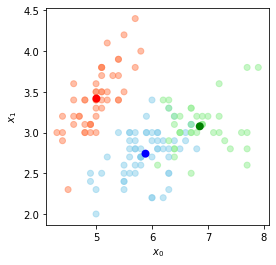

In [3]:
cluster_min_cost = np.argmin(iter_cost, axis=0)

if (np.isnan(cluster_min_cost) == True):
    print(np.isnan(cluster_min_cost))
    print("첫번째가 제일 작은 값!!")
    print(iter_cost[cluster_min_cost])
    print(iter_centroids[cluster_min_cost])
else:
    print(np.isnan(cluster_min_cost))
    print("두번째가 제일 작은 값!!")
    cluster_min_cost = second_smallest(iter_cost)
    idx = iter_cost.index(cluster_min_cost)
    print(iter_cost[idx])
    print(iter_centroids[idx])

group_colors = ['skyblue', 'coral', 'lightgreen']
colors = [group_colors[j] for j in classes]

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(X[: ,0], X[: ,1], color=colors, alpha=0.5)
ax.scatter(centroids[:,0], centroids[:,1], color=['b', 'r', 'g'], marker='o', lw=2)
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
plt.show()